In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

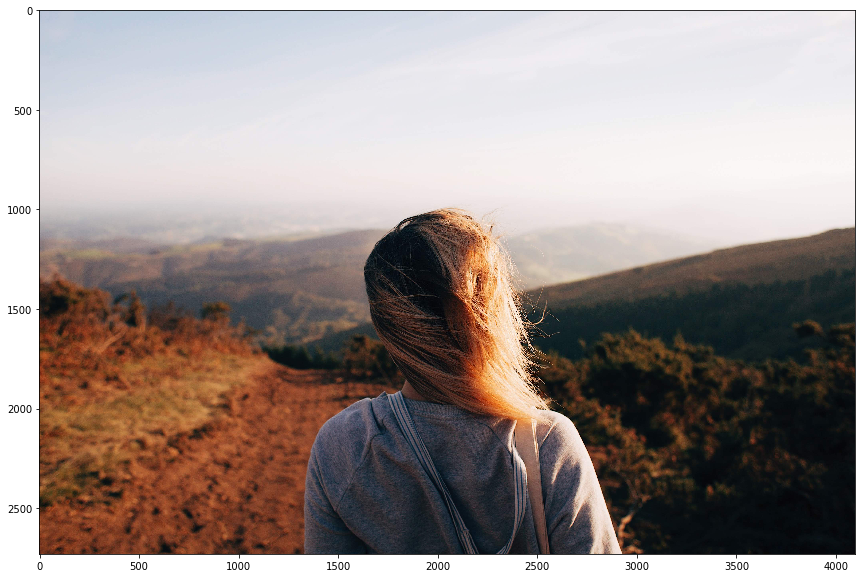

In [3]:
img_path_1 = './img.jpg'
img_1 = cv2.imread(img_path_1)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, figsize=[16, 10])
# ax.set_axis_off()
ax.imshow(img_1)
plt.show()

对图像旋转角度theta，需要使用下面形式的旋转矩阵：
$$\begin{bmatrix}cos\theta & -sin\theta \\\\ sin\theta & cos\theta \end{bmatrix}$$
矩阵数据类型为np.float32

Opencv允许你以图像上任意像素为中心旋转任意角度，但旋转矩阵需要具有如下形式：
$$\begin{bmatrix}\alpha & \beta & (1-\alpha)\cdot center_x - \beta\cdot center_y \\\\ -\beta & \alpha & \beta\cdot center_x+(1-\alpha\cdot center_x) \end{bmatrix}$$
其中：
$$\alpha=scale\cdot cos\theta$$
$$\beta=scale\cdot sin\theta$$


同时，Opencv也提供了创建旋转矩阵的方法函数cv2.getRotationMatrix2D.

#### cv2.getRotationMatrix2D(center, angle, scale)
+ center：旋转中心点(w, h)
+ angle：旋转角度(默认为沿逆时针方向)
+ scale：缩放因子

#### cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) 
+ src - 输入图像。
+ M - 变换矩阵。
+ dsize - 输出图像的大小[width, heigth]。
+ flags - 插值方法的组合（int 类型！）
+ borderMode - 边界像素模式（int 类型！）
+ borderValue - （重点！）边界填充值; 默认情况下，它为0。

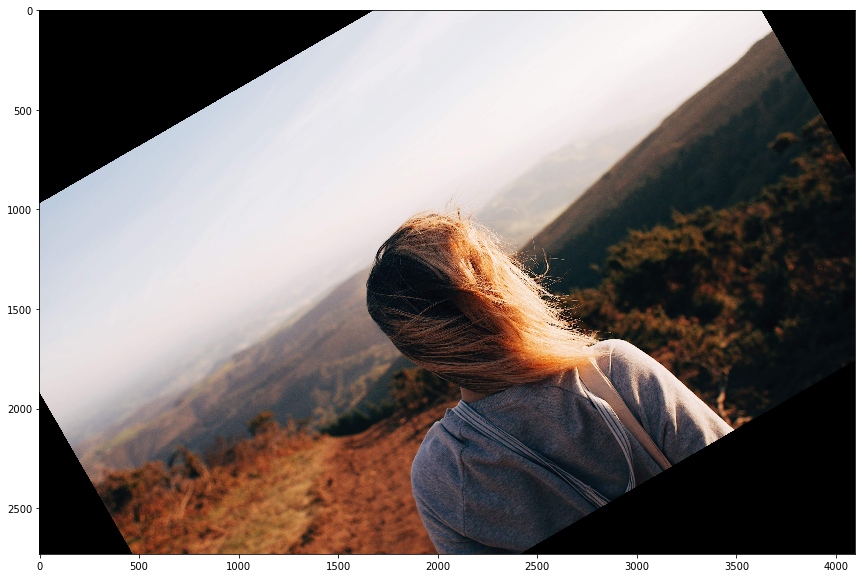

In [5]:
h, w, c = img_1.shape
center_1 = (h // 2, w // 2)
center_2 = (w // 2, h // 2)
angle = 30.
scale = 1.
rotation_matrix = cv2.getRotationMatrix2D(center=center_2, angle=angle, scale=scale)
img_rotation = cv2.warpAffine(img_1, rotation_matrix, (w, h))

# show
fig, ax = plt.subplots(1, figsize=[16, 10])
# ax.set_axis_off()
ax.imshow(img_rotation)
plt.show()